In [1]:
import numpy as np

from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
file = np.loadtxt(open("data/safeway/report.csv", "rb"), delimiter=",")
sort = file[file[:,0].argsort()]
data = sort[:,1:]
labels = sort[:,0]

colors = np.empty(991, dtype='object')
colors[0:199] = "green"
colors[199:398] = "blue"
colors[398:597] = "yellow"
colors[597:796] = "orange"
colors[796:] = "red"

'''
for i in range(991):
    if labels[i] > 13.714:
        colors_.append(5)
    elif labels[i] > 11.428:
        colors_.append(4)
    elif labels[i] > 9.142:
        colors_.append(3)
    elif labels[i] > 6.856:
        colors_.append(2)
    else:
        colors_.append(1)
colors = np.array(colors_)
'''

#print(data.shape)
#print(labels.shape)
#print(colors.shape)

'\nfor i in range(991):\n    if labels[i] > 13.714:\n        colors_.append(5)\n    elif labels[i] > 11.428:\n        colors_.append(4)\n    elif labels[i] > 9.142:\n        colors_.append(3)\n    elif labels[i] > 6.856:\n        colors_.append(2)\n    else:\n        colors_.append(1)\ncolors = np.array(colors_)\n'

In [3]:
pca = PCA(n_components=2)
pca.fit(data)
data_pca = pca.transform(data)

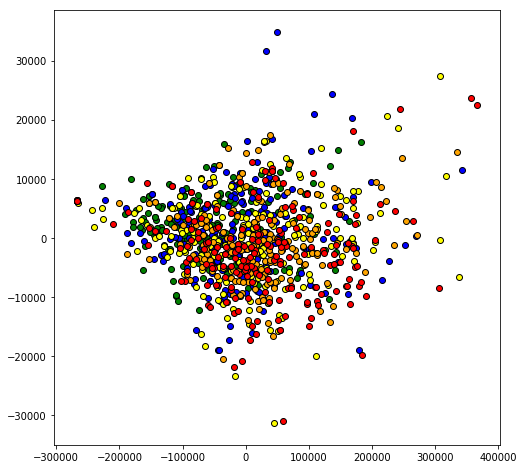

In [4]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,8))
for i in range(991):
    if labels[i] > 4.57:
        color = 'green'
    if labels[i] > 6.856:
        color = 'blue'
    if labels[i] > 9.142:
        color = 'yellow'
    if labels[i] > 11.428:
        color = 'orange'
    if labels[i] > 13.714:
        color = 'red'
    plt.scatter(data_pca[i,0],data_pca[i,1], c=colors[i], edgecolor='black', linewidth='1')
plt.show()

In [5]:
from sklearn.manifold import TSNE

data_embedded = TSNE(n_components=3,perplexity=30,learning_rate=200,n_iter=1000).fit_transform(data)
print(data_embedded.shape)

(991, 3)


C:\Users\Richard\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


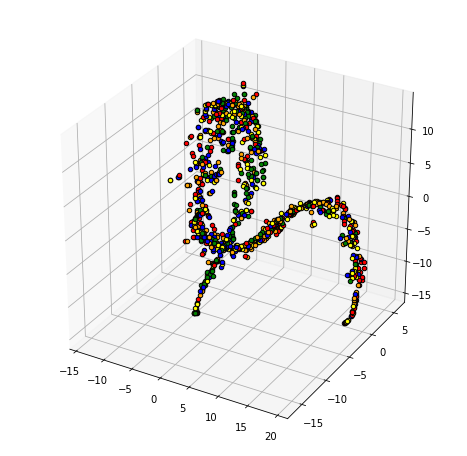

In [6]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
for i in range(991):
    if labels[i] > 4.57:
        color = 'green'
    if labels[i] > 6.856:
        color = 'blue'
    if labels[i] > 9.142:
        color = 'yellow'
    if labels[i] > 11.428:
        color = 'orange'
    if labels[i] > 13.714:
        color = 'red'
    #plt.scatter(data_embedded[i,0],data_embedded[i,1],data_embedded[i,2] c=colors[i], edgecolor='black', linewidth='1')
    ax.scatter(data_embedded[i,0],data_embedded[i,1],data_embedded[i,2], c=colors[i], edgecolor='black', linewidth='1')
fig.show()

In [8]:
#'''
from sklearn.metrics import silhouette_score

perplexity = [2, 5, 30, 50, 100]
learning_rate = [10, 100, 1000]
iters = [250, 500, 1000, 2000]
hp_dict = {}
j = 0
for p in perplexity:
    for lr in learning_rate:
        for i in iters:
            print(j)
            j += 1
            data_embedded = TSNE(n_components=2,perplexity=p,learning_rate=lr,n_iter=i).fit_transform(data)
            score = silhouette_score(data_embedded,colors)
            hp = str(p)+"_"+str(lr)+"_"+str(i)
            hp_dict[hp] = score
            plt.figure(figsize=(8,8))
            for i in range(991):
                plt.scatter(data_embedded[i,0],data_embedded[i,1], c=colors[i], edgecolor='black', linewidth='1')
            plt.savefig("figures/"+hp+".png")
            plt.close()
print(hp_dict)
#'''

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
{'2_100_2000': -0.04510121, '5_10_500': -0.048414566, '5_100_250': -0.067652494, '50_100_2000': -0.090769924, '50_10_2000': -0.094940297, '30_100_2000': -0.077956714, '30_100_1000': -0.072027348, '50_10_1000': -0.076910853, '2_10_500': -0.050944, '100_1000_2000': -0.11332221, '2_1000_2000': -0.053259656, '30_1000_500': -0.077596612, '30_10_1000': -0.066952482, '50_1000_1000': -0.10183254, '5_100_1000': -0.061342675, '100_1000_1000': -0.11065297, '5_10_1000': -0.052604929, '50_100_500': -0.076377735, '100_100_250': -0.11526316, '30_1000_250': -0.093215175, '2_10_1000': -0.058128569, '100_1000_500': -0.11066562, '5_100_2000': -0.050139103, '5_1000_500': -0.060107179, '50_100_1000': -0.089262307, '100_100_1000': -0.11085508, '100_1000_250': -0.088224068, '5_1000_250': -0.041157156, '100_10_1000': -0.10806005, '100_10_500'

In [10]:
perplexity = [2, 5, 30, 50, 100]
learning_rate = [10, 100, 1000]
iters = [250, 500, 1000, 2000]
hp_dict = {}
j = 0
for p in perplexity:
    for lr in learning_rate:
        for i in iters:
            print(j)
            j += 1
            data_embedded = TSNE(n_components=3,perplexity=p,learning_rate=lr,n_iter=i).fit_transform(data)
            score = silhouette_score(data_embedded,colors)
            hp = str(p)+"_"+str(lr)+"_"+str(i)
            hp_dict[hp] = score
            fig = plt.figure(figsize=(8,8))
            ax = fig.gca(projection='3d')
            for i in range(991):
                ax.scatter(data_embedded[i,0],data_embedded[i,1],data_embedded[i,2], c=colors[i], edgecolor='black', linewidth='1')
            fig.savefig("figures3/"+hp+".png")
            plt.close()
print(hp_dict)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
{'2_100_2000': -0.036836166, '5_10_500': -0.043133654, '5_100_250': -0.045036059, '50_100_2000': -0.067159034, '50_10_2000': -0.066527963, '30_100_2000': -0.055212628, '30_100_1000': -0.053079069, '50_10_1000': -0.064871557, '2_10_500': -0.03112079, '100_1000_2000': -0.038520776, '2_1000_2000': -0.039714318, '30_1000_500': -0.035606544, '30_10_1000': -0.055758826, '50_1000_1000': -0.041538358, '5_100_1000': -0.035037853, '100_1000_1000': -0.043018758, '5_10_1000': -0.038528126, '50_100_500': -0.067316689, '100_100_250': -0.11445447, '30_1000_250': -0.05037782, '2_10_1000': -0.028753348, '100_1000_500': -0.036214873, '5_100_2000': -0.041595958, '5_1000_500': -0.047253106, '50_100_1000': -0.070579633, '100_100_1000': -0.10418671, '100_1000_250': -0.081967637, '5_1000_250': -0.040159132, '100_10_1000': -0.09099558, '100_1